## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#reading the data into pandas and inspecting the dataset.
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
#Here we are finding the number of rows by using the shape function.
rows = df.shape[0]
print('The total number of rows in the dataset is {}'.format(rows))

The total number of rows in the dataset is 294478


c. The number of unique users in the dataset.

In [4]:
#Here we are using the unique function to gather the number of unique users in the dataset based off their user_id.
users = df.nunique()['user_id']
print('The total number of unique users in the dataset is {}'.format(users))

The total number of unique users in the dataset is 290584


d. The proportion of users converted.

In [5]:
#In order to find the proportion of users that are converted, we use the mean since the values will be between 1 and 0.
print('The converted proportion of users is {:.2f}%'.format((df['converted'].mean())*100))

The converted proportion of users is 11.97%


e. The number of times the `new_page` and `treatment` don't match.

In [6]:
#This is where the treatment group user incorectly lands on the old page.
mis_1 = df.query("group == 'treatment' and landing_page =='old_page'")
print('The number of times the treatment group user lands incoreclty on the old page is {}'.format(len(mis_1)))
#This is where the control group user incorectly lands on the new page.
mis_2 = df.query("group == 'control' and landing_page == 'new_page'")
print('The number of times the control group user lands incoretly on the new_page is {}'.format(len(mis_2)))
#This is the number of times the new page and treatment do not line up. It should be the sum of both group numbers.
print('The number of times the new_page and treatment don not line up is {}'.format(len(mis_1) + len(mis_2)))

The number of times the treatment group user lands incoreclty on the old page is 1965
The number of times the control group user lands incoretly on the new_page is 1928
The number of times the new_page and treatment don not line up is 3893


f. Do any of the rows have missing values?

In [7]:
#We can check the number of missing values by using the info function.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


We can see that there is no missing values

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#Delete and drop rows for the mismatched treatment groups.
df.drop(df.query("group == 'treatment' and landing_page == 'old_page'").index, inplace = True)
#Delete and drop rows for the mismatched control groups.
df.drop(df.query("group == 'control' and landing_page == 'new_page'").index, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [10]:
#We will save and clean the new dataset.
df.to_csv('ab_edited.csv', index=False)

In [11]:
df2= pd.read_csv('ab_edited.csv')
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

As you can see, the newly saved dataset has the same info as before, this shows that it is saved and can be read into at any point going foreward.

In [13]:
#Finding the unique user ID count.
len(df2['user_id'].unique())

290584

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.1+ MB


b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
#Finding the unique user ID count.
len(df2['user_id'].unique())

290584

c. What is the row information for the repeat **user_id**? 

In [16]:
#Finding the duplicate row with a repeat user ID.
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [17]:
#Checking the index of the duplicate user.
df2[df2.duplicated(['user_id'], keep=False)].index

Index([1876, 2862], dtype='int64')

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [18]:
#Deleting the duplicate record
df2=df2.drop(df2[(df2.user_id==773192)&(df2['timestamp']=='2017-01-09 05:37:58.781806')].index)
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [19]:
#Testing to see if the duplicat was removed successfully. As you can see, it was.
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [20]:
#We can use the mean function to get the probability of any individual converting value since they are between 0 and 1.
df['converted'].mean()

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [21]:
#We will group by the column 'group' and then use the describe function to get the statistics.
df_grp = df.groupby('group')
df_grp.describe()

user_id                                                   \
              count           mean           std       min       25%   
group                                                                  
control    145274.0  788164.072594  91287.914601  630002.0  709279.5   
treatment  145311.0  787845.618446  91161.258854  630000.0  708746.5   

                                         converted                           \
                50%        75%       max     count      mean       std  min   
group                                                                         
control    788128.5  867208.25  945998.0  145274.0  0.120386  0.325414  0.0   
treatment  787874.0  866718.50  945999.0  145311.0  0.118807  0.323563  0.0   

                               
           25%  50%  75%  max  
group                          
control    0.0  0.0  0.0  1.0  
treatment  0.0  0.0  0.0  1.0

c. Given that an individual was in the `treatment` group, what is the probability they converted?

Since the user was in the control group, the probability they converted would be .118807

d. What is the probability that an individual received the new page?

In [22]:
#The number of people who recived the new page is the same as those in the treatment group
new = len(df.query("group == 'treatment'"))
#we can calculate the total number of users using the shape function
users = df.shape[0]
#We then discover that the probibility of any one person getting the new pated is new/users
new_p = new/users
print(new_p)

0.5000636646764286


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

### Does the new landing page result in more conversions?

- The probibility of the control group being converted was about 12 percent(.120386).
- The probability of the treatment group being converted was just shy of 12 percent(.118807).
- The previous landing page appears to do marginly better than the new page. However, the percentage is basically the same.
- There could be some factors that are not accounted for in this data, as such it appears that there is not any clear cut winner with this change. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

## Hypothesis

-- **$H0:$** **$p_{old}$** >= **$p_{new}$**

-- **$H1: p_{old} < p_{new}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [23]:
#Here we are checking the conversion rate for p_new
p_new = df2['converted'].mean()
print(p_new)

0.11959708724499628


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [24]:
#Here we are checking the conversion rate for p_old
p_old = df2['converted'].mean()
print(p_old)

0.11959708724499628


c. What is $n_{new}$, the number of individuals in the treatment group?

In [25]:
#Here we are n_new number. This is the individuals that are in the treatment group
n_new = len(df2.query("group == 'treatment'"))
print(n_new)

145310


d. What is $n_{old}$, the number of individuals in the control group?

In [26]:
#Here we are n_old number. This is the individuals that are in the control group
n_old = len(df2.query("group == 'control'"))
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [27]:
new_page_converted = np.random.choice([1,0], size = n_new, p=[p_new, (1-p_new)])
print(len(new_page_converted))

145310


f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [28]:
old_page_converted = np.random.choice([1,0], size = n_old, p=[p_new, (1-p_old)])
print(len(old_page_converted))

145274


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [29]:
#If we try to find the difference between Pnew and Pold at this time, we will get an error because they are not the same size
#As such, we will first need to reduce the excess on the new_page_converted factor using the value of the old_page_converted.
new_page_converted = new_page_converted[:145274]
print(len(new_page_converted))

145274


In [30]:
#Finding the difference in converted pages
p_diff = (new_page_converted/n_new) - (old_page_converted/n_old)
print(p_diff)

[0.00000000e+00 6.88183883e-06 0.00000000e+00 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [31]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([1,0], size = n_new, p=[p_new, (1-p_new)]).mean()
    old_page_converted = np.random.choice([1,0], size = n_old, p=[p_new, (1-p_old)]).mean()
    diff = new_page_converted - old_page_converted
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

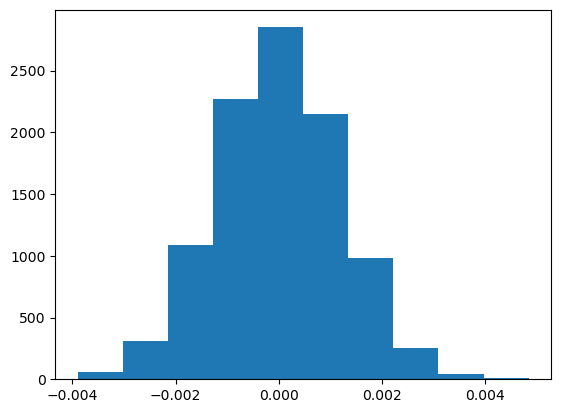

In [32]:
#histogram showing the p_diffs
plt.hist(p_diffs)
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [33]:
#We will compute the difference from the orignal dataset csv file.
a_diff = df[df['group']=='treatment']['converted'].mean() - df[df['group']=='control']['converted'].mean()
print(a_diff)

-0.0015790565976871451


In [34]:
(np.array(p_diffs)>a_diff).mean()

0.9054

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

- We are calculating the p-values, that is, the probability of observing any given statistic given that the null hypothesis is true.
- We find that the p-value is higher thatn the error rate of five percent, and as such, the null hypothesis is seen to be true.
- Basicaly, confirming that the old page will perform just as well if not a little better than the new page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [35]:
import statsmodels.api as sm

#Figuring out the conversions for the control and treatment page
convert_old = df2.query("group == 'control' and converted == 1").shape[0]
convert_new = df2.query("group == 'treatment' and converted == 1").shape[0]
n_old = df2.shape[0] - df2.query("group == 'control'").shape[0]
n_new = df2.query("group == 'treatment'").shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [36]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score) 
print(p_value)

1.286299137965753
0.9008306583826964


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

- We determine that the values are not statistically different enough, and as such, we do not reject the null hypothesis.
- We know this by looking at the z-score and realizing that it is extremely close to the null mean.
- The p-value shows that there is enough significance to confirm the findings of the values in sections J and K.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

- Here we should be using logistic regression. This is due to the response variable is a categorical variable. Logistic regression is multiple regression with an outcome variable that is where both the catigorical and predictor variables are continuous.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
#Here we are adding an intercept to the df2.
df2['intercept']=1
#Here we are creating the dummy variable column.
df2['ab_page']=pd.get_dummies(df2['group'])['treatment'].astype(int)
#Here we are showing our results. As you can see, they ab_page would not generate 1/0 for me for some reason.

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [38]:
#Here we are importing the needed module.
import statsmodels.api as sm
#Here we are using the statsmodel to instantiate our regression model based on the new columns.
logit=sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [39]:
#Here we are setting our results.
result = logit.fit()
#Here we are showing the summary of the results.
result.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:               8.077e-06
Time:                        08:55:02   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

-- The original test was abse on the hypothesis that one of the pages had a higher rate of conversion.
-- This test only showed the difference(if there is any) in the conversion rate of each landing page.

the new hypothesis would look something like this.

-- **$H0:$** **$p_{new}$**- **$p_{old}$** = **$0$**

-- **$H1:$** **$p_{new}$**- **$p_{old}$** != **$0$**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

- I believe that it would be benificial to incorporate additonal factors into the model because there are always multiple reasons that could influance any conversion rate.
- There could be some disadvantages however, such as there is no way to factor everything into any model and the more you incoporate into any model, there is a greater chance io introduce errors.
- There is also the fact that sometimes, things done on a smaller scale can be more efficent than looking at longer models with a lot more data to annalize.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
#Here we are reading in the countries csv file.
countries_df = pd.read_csv('./countries.csv')
#Here we are checking the header to see if the file loaded correctly.
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [41]:
#Here we are joining the needed tables.
df3=countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [42]:
#Here we are setting the dummie variables.
df3[['CA', 'US']] = pd.get_dummies(df3['country'])[['CA','US']].astype(int)
#Here we are checking the header again to ensure that they have been loaded correctly.
df3.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0


In [43]:
#Here we are using the statsmodel to instantiate our regression model based on the new columns.
logit=sm.Logit(df3['converted'],df3[['CA', 'US']])

In [44]:
#Here we are setting our results.
result = logit.fit()
#Here we are showing the summary of the results.
result.summary()

Optimization terminated successfully.
         Current function value: 0.447174
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                 -0.2214
Time:                        08:55:03   Log-Likelihood:            -1.2994e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CA            -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US            -1.9967      0.007   -292.314      0.000      -2.010      -1.983
==============================================================================
"""

In [45]:
#Here we are checking the ab_page odds ratios
np.exp(-0.0149)

0.9852104557227469

In [46]:
#Here we are checking the Canada odds ratios
np.exp(-2.0375)

0.13035418933417164

In [47]:
#Here we are checking the United States odds ratios
np.exp( -1.9967)

0.1357826273831706

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion. Create the necessary additional columns, and fit the new model.

Provide the summary results, and your conclusions based on the results.

In [48]:
#We will create a variable interaction between the ab_page and the country.
df3['ab_page_CA']=df3['ab_page']*df3['CA']
df3['ab_page_US']=df3['ab_page']*df3['US']

In [49]:
df3.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,US,ab_page_CA,ab_page_US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,0,0


In [50]:
#Creating the new regression model.
logit=sm.Logit(df3['converted'],df3[['intercept','ab_page','CA','US','ab_page_CA','ab_page_US']])
#Here we are fitting the new model.
results=logit.fit()
#Here we are showing the results
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Method:           MLE        
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2023-10-02 08:55 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           LLR p-value:      0.19199    
No. Iterations:     6.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9922    0.0161  -123.4571  0.0000  -2.0238  -1.9606
ab_page       0.0108    0.0228     0.4749  0.6349  -0.0339   0.0555
CA           -0.0118    0.0398    -0.2957  0.7674  -0.0899   0.0663
US            0.0057    0.0188     0.3057  0.7598  -0.0311   0.0426
ab_page_CA   -0.0783    0.0568    -1.3783  0.1681  -0.1896   0.0330
ab_page_US   -0.0314    0.0266    -1.1807  0.2377  -0.0835   0.0207
==================================================================

"""

- Even when we factor the different countries into the model, it still is not a wide enough margin to reject the null hypothesis.
- Thus, same as before it is in our best intrest to accept the null hypothesis just as we have in every other section.

# In conclusion

Through the length of this study, we have not determined that there is enough evidence to make a conclusive argument either way as it pertains to which landing page will lead to a higher conversion rate. That being said, the old landing page will get more or equal conversions than the new one based on the data. While the data will always be a limiting factor and more tests might be needed, based on the amount of information on hand, I recommend accepting the null hypothesis.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [51]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

1